# Проект : Исследование продаж игр за 2016 год

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Задачи исследования

# Изучение общей информации
- загрузить данные из файла в датафрейм
- изучить общую информацию о полученном датафрейме
- построить общую гистограмму для всех числовых столбцов таблицы
- изучить информацию в общей гистограмме
- краткий вывод

# Предобработка данных
**Замена названия столбцов**
- определить, в каких столбцах есть необходимость заменить регистр
- произвести замену

**Изменение типов данных**
- проанализировать столбцы с данными
- преобразовать тип данных по необходимости
- указать причины замены данных

**Удаление пропусков**
- определить, в каких столбцах есть пропуски
- избавиться от пропущенных значений
- заполнить пропущенные значения там, где это возможно
- указать возможные причины пропусков

**Обработка дубликатов**
- проанализировать столбцы с данными
- произвести устранение дубликатов

**Добавить в таблицу новые столбцы**
- посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

# Исследовательский анализ данных
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам
- Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Посмотрим, как влияют на продажи внутри одной популярной платформы (PS2) отзывы пользователей и критиков 
- Соотнесем выводы с продажами игр на других популярных платформах
- Посмотрим на общее распределение игр по жанрам
- Вывод по исследовательскому анализу данных

# Составьте портрет пользователя каждого региона
- Определим самые популярные консоли
- Определим самый популярный жанр
- Определим в игры с каким рейтингом любят играть в Америке, Европе и Японии
- Сосатвим портрет игроков по регионам

# Проверьяю гипотезы
- Гипотеза №1
- Гипотеза №2
- выводы по гипотезам

# Общий вывод

## Изучение общей информации

Импортирую библиотеки. Считываю данные из csv-файла в датафрейм и сохраняю в переменную games.

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
%matplotlib inline

In [95]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

Вывожу первые 10 строчек датафрейма games.

In [96]:
pd.set_option('display.max_columns', None)

In [97]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вывожу последние 10 строчек датафрейма games.

In [98]:
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Вывожу основную информацию о датафрейме с помощью метода describe().

In [99]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывожу основную информацию о датафрейме с помощью метода info().

In [100]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Строю общую гистограмму для всех числовых столбцов датафрейма.

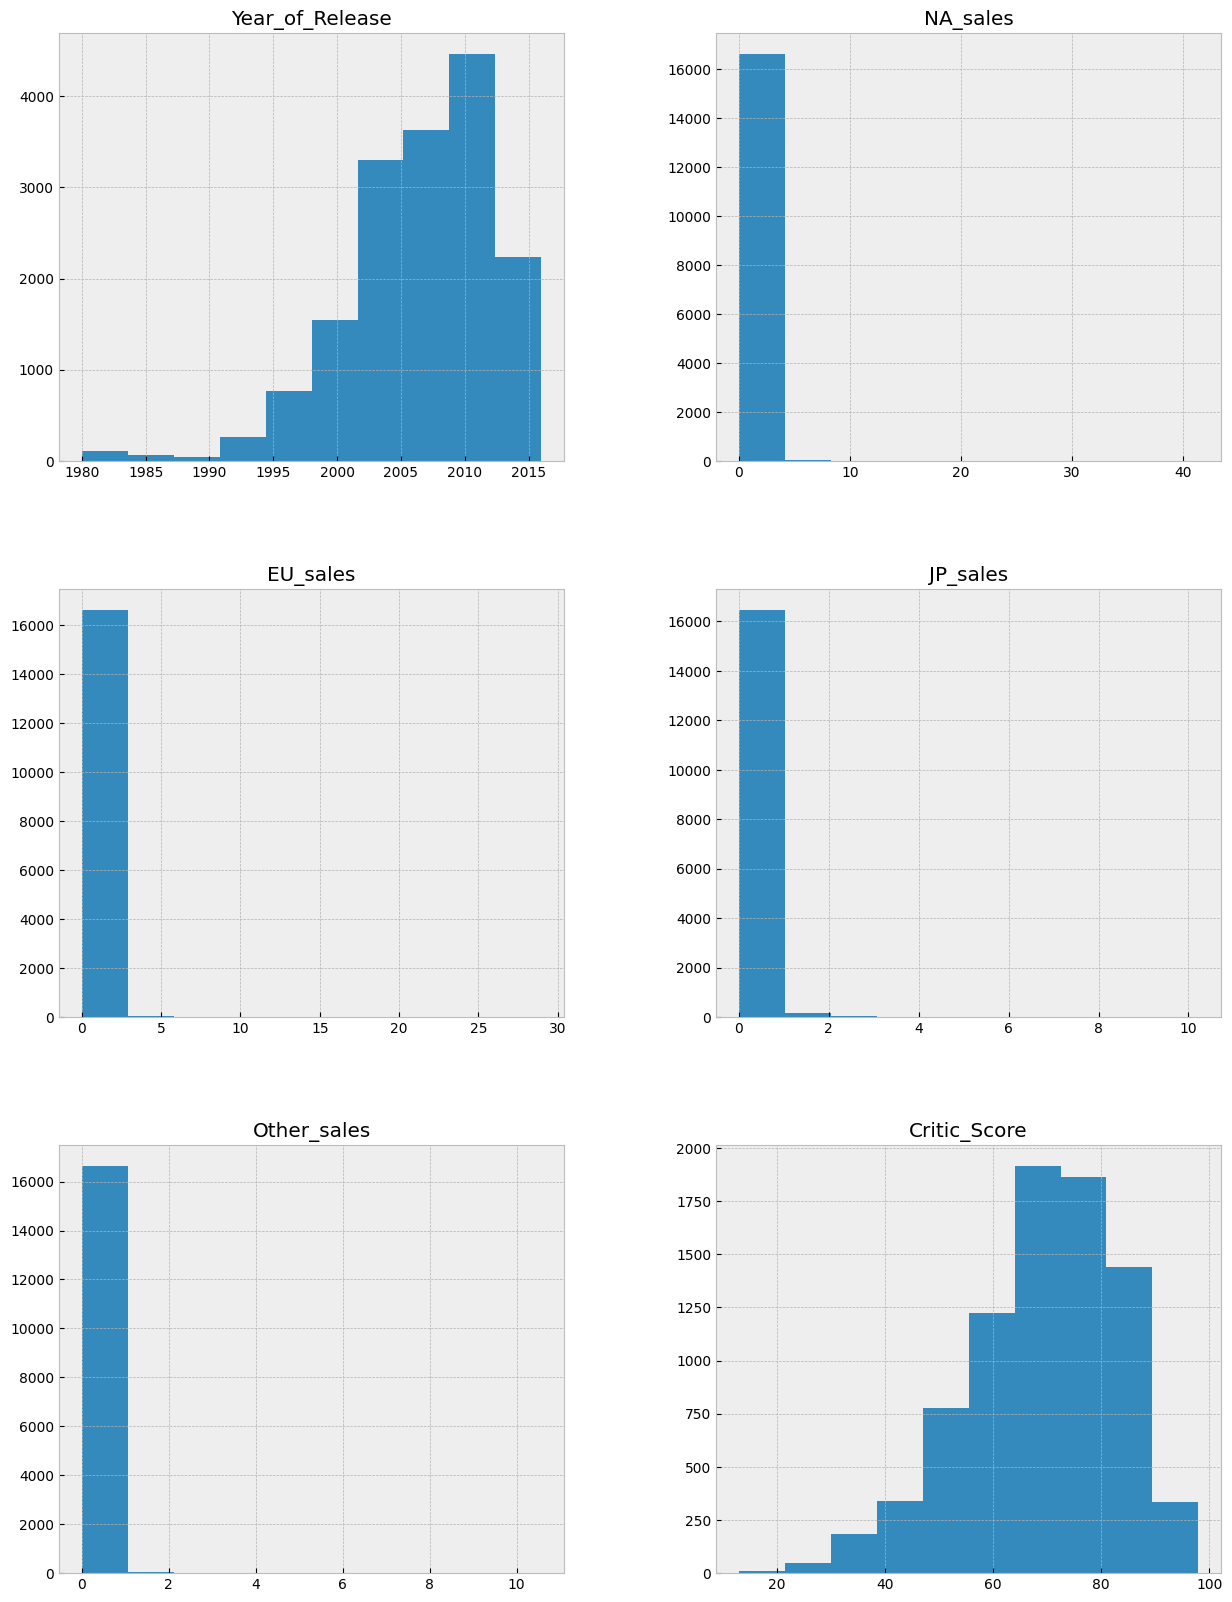

In [101]:
games.hist(figsize=(15, 20));

После первичного осмотра, видно, что есть отсутствующие значения, некорректный тип данных, регистр в названии столбцов. Над этими данными необходимо поработать.

## Предобработка данных

Перед предобработкой сохраню первоначальные данные

In [102]:
old_games = games.copy()

### Замена названия столбцов

Вывожу информацию с названием столбцов

In [103]:
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Привожу названия к нижнему регистру.

In [104]:
games.columns = games.columns.str.lower()

In [105]:
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Изменение типов данных

Вывожу основную информацию о датафрейме с помощью метода info().

In [106]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сделаем значения в столбце year_of_release целыми.

In [107]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [108]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [109]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Повнимательнее изучим чтолбец user_score

In [110]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [111]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
Скорее всего данная аббревиатура возникает,  когда не достаточное кол-во пользователей проголосовало за игру. Заменим данную абривиатуру на NaN

In [112]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

- year_of_release поменял типа данных на 'int', потому как десятые для годов не нужны
- user_score поменял типа данных на 'float', т.к. оценка пользователей должна быть в цировом формате.

### Удаление пропусков

Вывожу информацию о пропущенных значениях и сортирую по убыванию

In [113]:
games.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Заменим пропущенные значения

In [114]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)

games['rating'] = games['rating'].fillna('out of rating')

Удаляю пропущенные значения

In [115]:
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])
games = games.dropna(subset=['year_of_release'])

In [116]:
games.isna().sum().sort_values(ascending=False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Обработка дубликатов

Проверим на наличие дубликатов

In [117]:
games.duplicated().sum()

0

In [118]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [119]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [120]:
games['rating'].unique()

array(['E', 'out of rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Дубликатов не обнаружено

- user_score, critic_score меняем пропущенные значения на -1. Скорее всего оценка формируется если проголосовало определенное кол-во человек, нет проголосовавших, нет значений.
- genre, name судя по кол-ву пропусков здесь скорее всего причиной стал человеческий фактор
- rating рискну предположить, что основной причиной пропусков является год релиза, сама система ESRB основана в 1994 году, а некоторые из рейтингов появились лишь в 2005. Соответвенно, игры вышедшие до 1994 по умолчанию не могли иметь рейтинг данной организации, добавим время на внедрение системы в мировую игровую сферу, вот и получаются отсутсвие рейтинга у ряда игр.

### Добавить в таблицу новые столбцы

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [121]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,out of rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,out of rating,28.31


Проверим отброшенное кол-во данных

In [122]:
games.shape[0] / old_games.shape[0]

0.9837870176488184

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Создаю сводную таблицу и вывожу график распределения

In [123]:
games_year = games.\
pivot_table (index='year_of_release', values = 'total_sales', aggfunc='count')

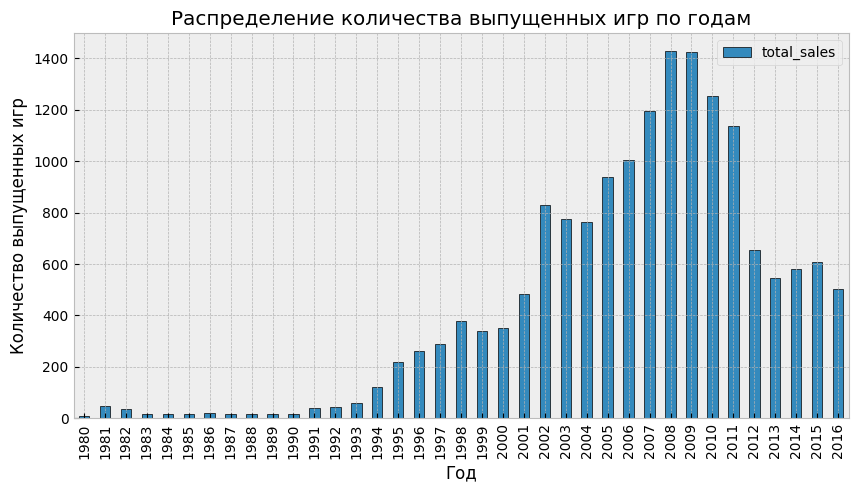

In [124]:
ax = games_year.plot(y='total_sales', kind='bar', ec='black', figsize=(10,5));
ax.set_title('Распределение количества выпущенных игр по годам')
ax.set(xlabel='Год', ylabel='Количество выпущенных игр');

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Данные до 1994го в принципе не особо интересны. До этого времени разнообразия платформ было не так много, и игр для них выпускалось не очень много, при этом зачастую, платили за саму консоль, а игры были бесплатно. В 1995 появляется консоль PlayStation в 2001 Xbox,  и до 2010 идет рост популярности и выпуска новых игр.  После 2010 начинается спад продаж, на игровых консолях. По моему мнению, интерес у обывателей к играм не пропал, изменился формат подачи игр. Кроме самой проданной игры разработчики начали зарабатывать деньги на выпуске DLC к играм, причем могло быть так, что саму игру отдавали бесплатно,  а каждая DLC стоила достаточно дорого. Так же появился формат игр, когда игра по умолчанию бесплатная, однако внутри игровой процесс предусматривает донат. Часть игр перекочевала на мобильные решения. Ко всему прочему, разработчики игр на различных платформах, начали подходить к выпуску игр более серьезно, создавая все более качественный продукт, тем самым увеличив интервалы между выходом игр. В итоге, в игры как играли так и играют, но для качественного  анализа требуется учитывать  гораздо больше критериев.

### Посмотрим, как менялись продажи по платформам. 

Создаю сводную таблицу и вывожу график распределения

In [125]:
games_platform = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [126]:
games_platform.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


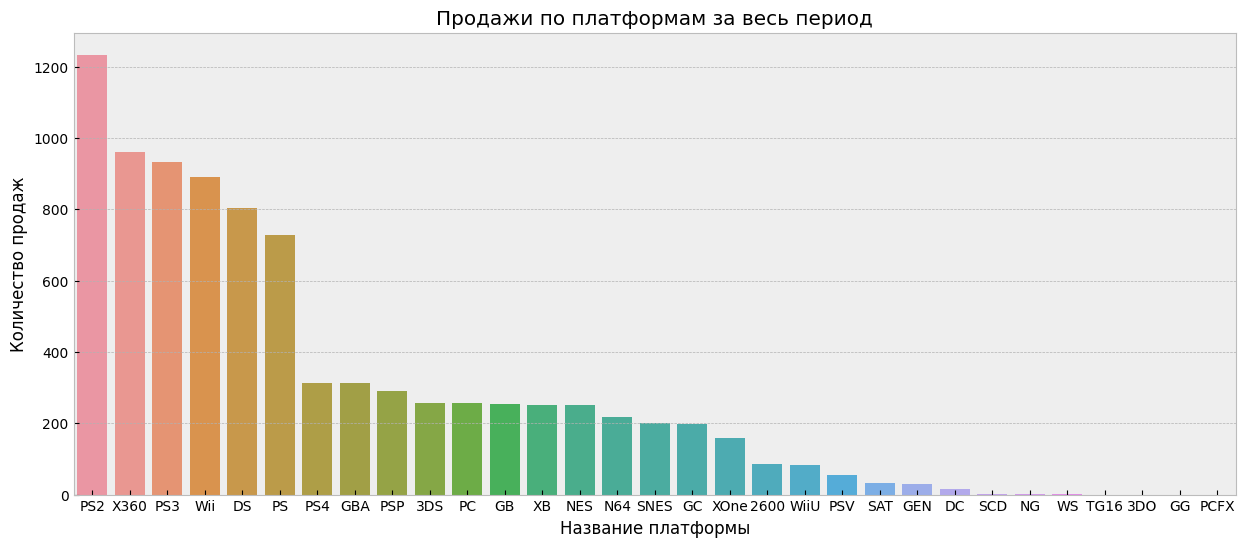

In [127]:
plt.figure(figsize=(15,6));
sns.barplot(x=games_platform.index,y=games_platform['total_sales']);
plt.title("Продажи по платформам за весь период");
plt.xlabel("Название платформы");
plt.ylabel("Количество продаж");

График по продаже платформ за все годы

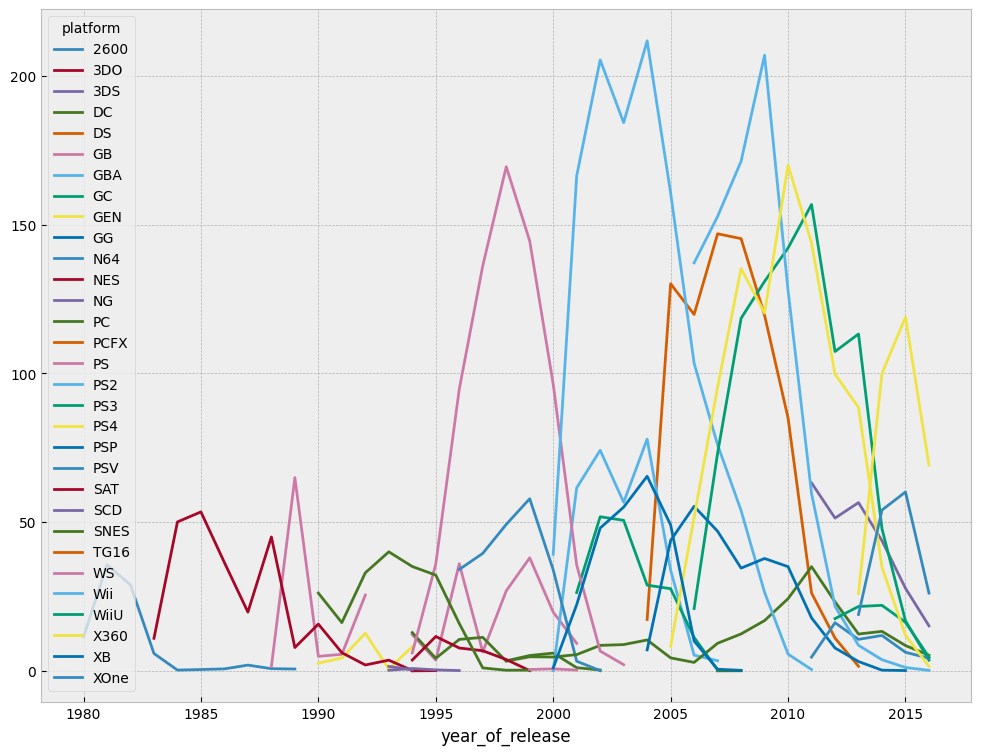

In [128]:
games.pivot_table(index='year_of_release', 
                  columns = 'platform', 
                  values='total_sales', 
                  aggfunc='sum'). \
plot.line(grid=True, figsize=(12,9));

Больше всего игр было продано для PlayStation2, немного меньше для Xbox360, PS3, Wii, DS, PS.

Сделаю срез даных с 2012 по 2016 года

In [129]:
games_actual_years = games.query('year_of_release > 2011').reset_index(drop=True)

Создаю сводную таблицу и вывожу график распределения

In [130]:
games_actual_years_platform = games_actual_years.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [131]:
games_actual_years_platform.head(10)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


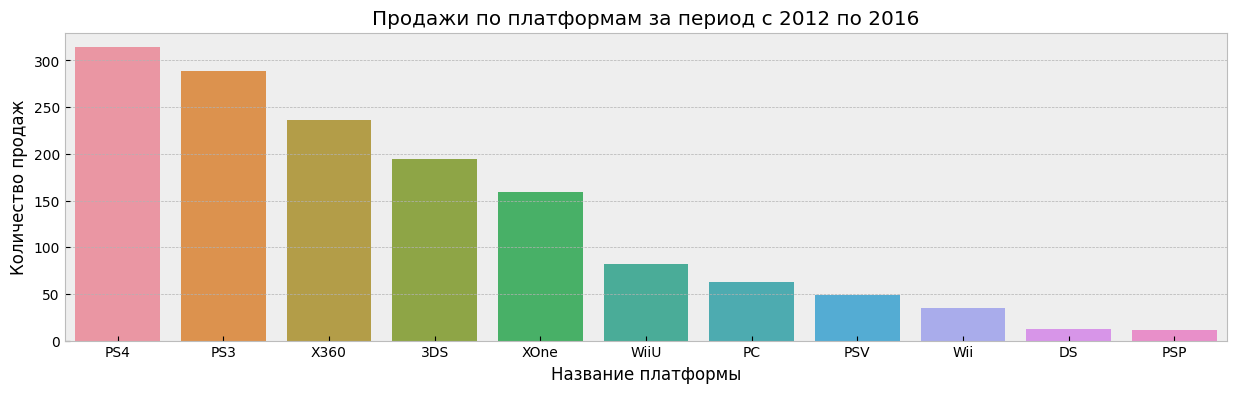

In [132]:
plt.figure(figsize=(15,4));
sns.barplot(x=games_actual_years_platform.index,y=games_actual_years_platform['total_sales']);
plt.title("Продажи по платформам за период с 2012 по 2016");
plt.xlabel("Название платформы");
plt.ylabel("Количество продаж");

Больше всего игр было продано для PS4, немного меньше для PS3, Xbox360, PS3, 3DS, XOne.

График по продаже платформ c 2012 по 2016 годы

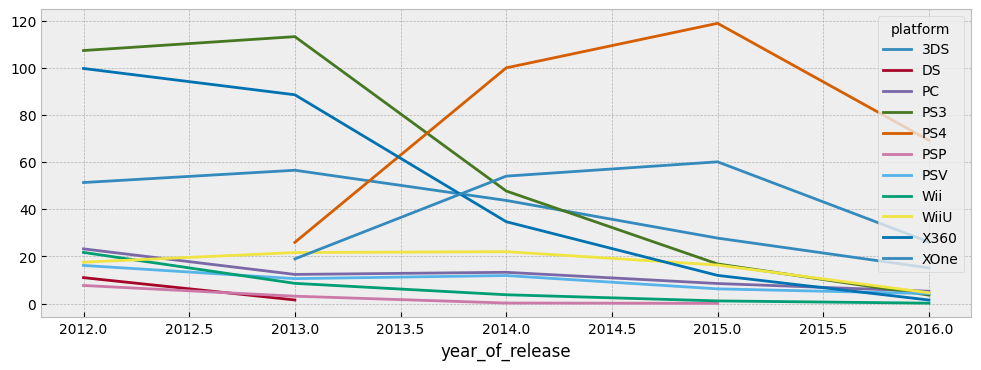

In [133]:
games_actual_years.pivot_table(
            index='year_of_release', 
            columns = 'platform', 
            values='total_sales', 
            aggfunc='sum'). \
plot.line(grid=True, figsize=(12,4));

График по продаже для ТОП 5 платформ c 2012 по 2016 годы

In [134]:
top_5_platform = ['PS4', 'X360', 'PS3', '3DS', 'XOne']

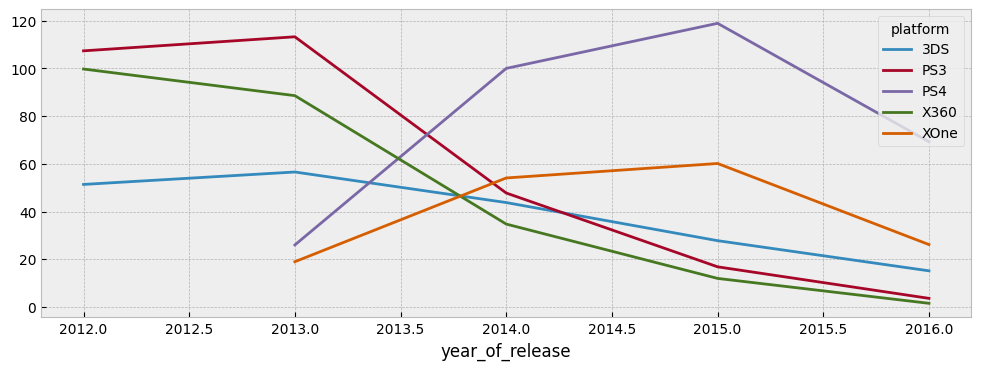

In [135]:
games_actual_years.query('platform in @top_5_platform'). \
pivot_table(index='year_of_release', 
            columns = 'platform', 
            values='total_sales', 
            aggfunc='sum'). \
plot.line(grid=True, figsize=(12,4));

Подытожим:
- Средняя жизнь консоли порядка 10 лет. Основной пик продаж приходит приблизительно на 5ый год существования платформы, после чего начинается спад. Если проанализировать  график для консолей PlayStation, то видно, что начало спада неразрывно связанно с выходом консолей нового поколения.
- На мой взгляд, актуальным периодом, является период с 2012 по 2016 год, в этом периоде представлены данные, по большинству самых популярным консолей
- Самые продаваемые это Sony PlayStation и XBOX, соответсвенно в 2017 стоит ожидать устойчивого роста PS4 и XBox One.

### Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [136]:
games_actual_years['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

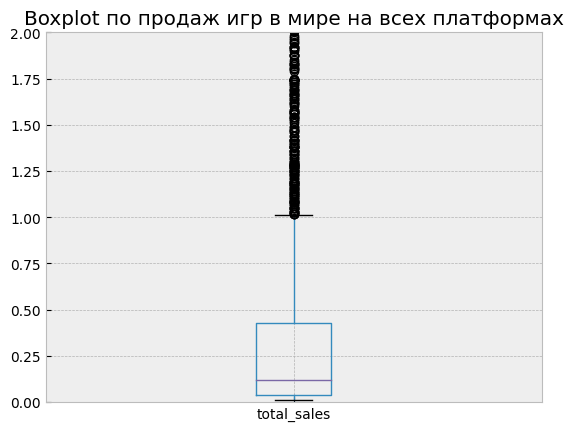

In [137]:
plt.title('Boxplot по продаж игр в мире на всех платформах')
plt.ylim(0,2)
games_actual_years.boxplot('total_sales');

In [138]:
PS4_games_sales = games_actual_years.query('platform =="PS4"')
PS4_games_sales['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

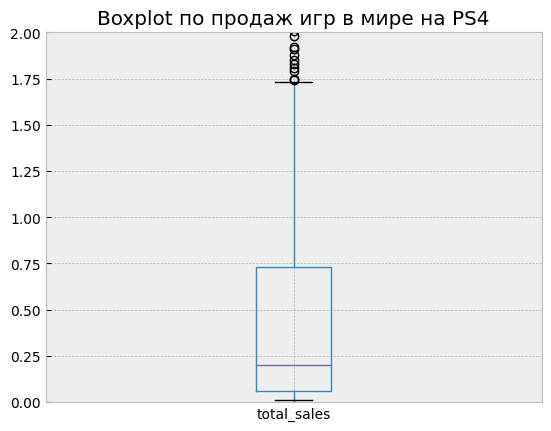

In [139]:
plt.ylim(0,2)
plt.title('Boxplot по продаж игр в мире на PS4')
PS4_games_sales.boxplot('total_sales');

In [140]:
X360_games_sales = games_actual_years.query('platform =="X360"')
X360_games_sales['total_sales'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64

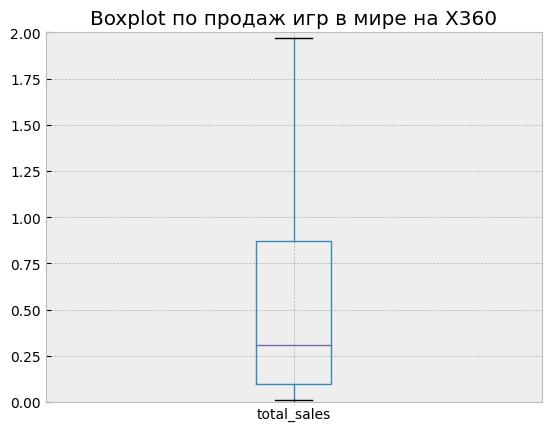

In [141]:
plt.ylim(0,2)
plt.title('Boxplot по продаж игр в мире на X360')
X360_games_sales.boxplot('total_sales');

In [142]:
PS3_games_sales = games_actual_years.query('platform =="PS3"')
PS3_games_sales['total_sales'].describe()

count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

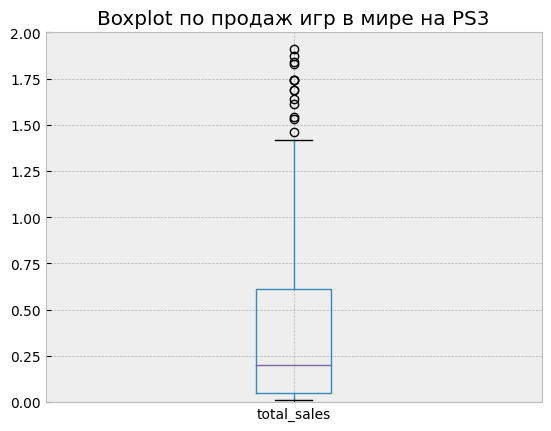

In [143]:
plt.ylim(0,2)
plt.title('Boxplot по продаж игр в мире на PS3')
PS3_games_sales.boxplot('total_sales');

In [144]:
XOne_games_sales = games_actual_years.query('platform =="XOne"')
XOne_games_sales['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

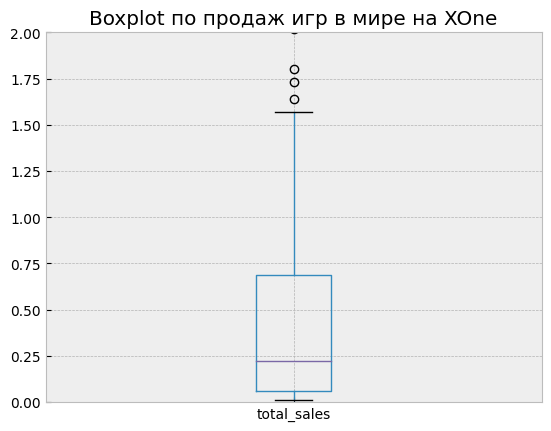

In [145]:
plt.ylim(0,2)
plt.title('Boxplot по продаж игр в мире на XOne')
XOne_games_sales.boxplot('total_sales');

In [146]:
DS_games_sales = games_actual_years.query('platform =="3DS"')
DS_games_sales['total_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

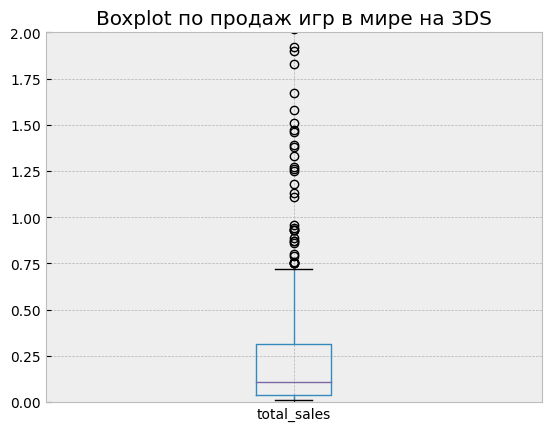

In [147]:
plt.ylim(0,2)
plt.title('Boxplot по продаж игр в мире на 3DS')
DS_games_sales.boxplot('total_sales');

Создаю список топ 5 платформ

In [148]:
top_5_platform = ['PS4', 'X360', 'PS3', '3DS', 'XOne']

Делаю срез по топ 5 платформ

In [149]:
games_top_5_platform = games_actual_years.query('platform in @top_5_platform').reset_index(drop=True)

In [150]:
games_top_5_platform['total_sales'].describe()

count    1820.000000
mean        0.655714
std         1.477562
min         0.010000
25%         0.060000
50%         0.190000
75%         0.630000
max        21.050000
Name: total_sales, dtype: float64

Проанализировав полученную информацию откидываю выбросы

In [151]:
games_top_5_platform = games_top_5_platform.query('total_sales < 2').reset_index(drop=True)

Сторою общий Boxplot

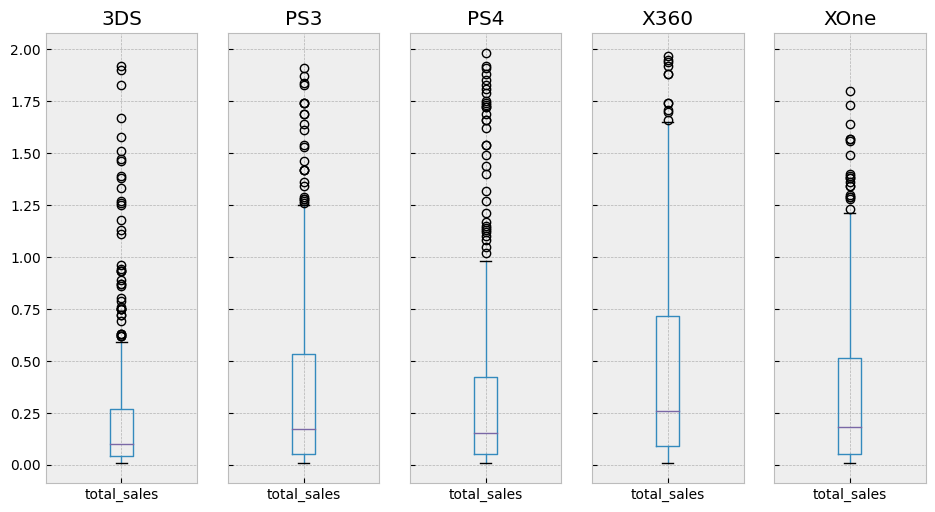

In [152]:
games_top_5_platform.groupby(['platform']).boxplot(column='total_sales', figsize=(11, 6), layout=(1, 5));

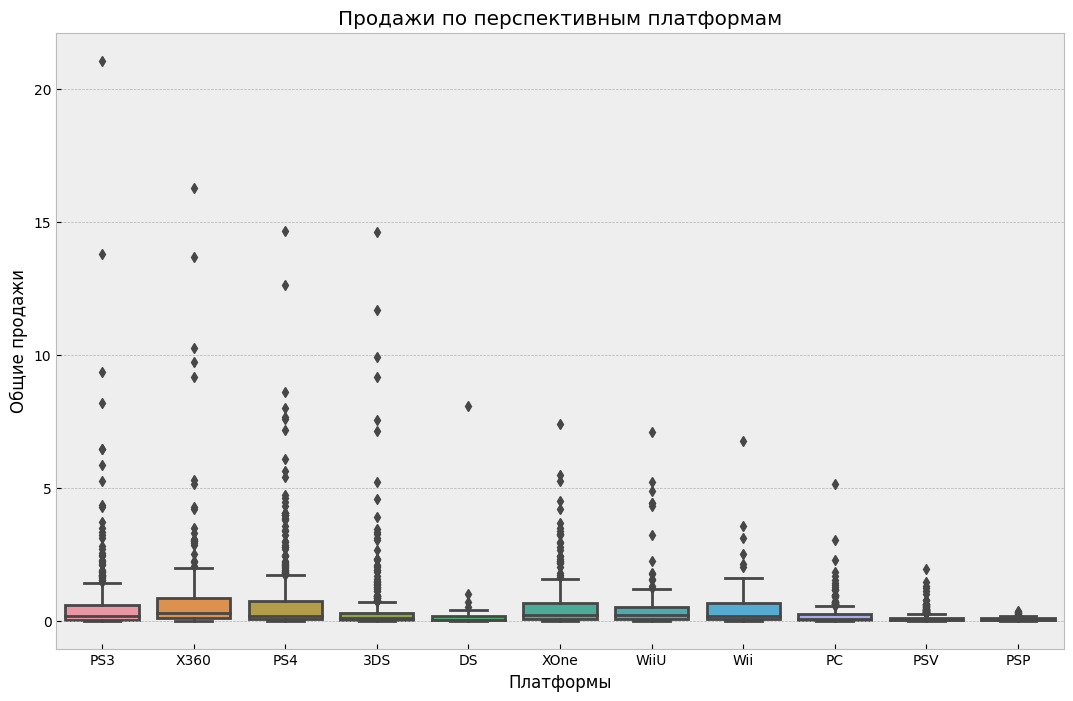

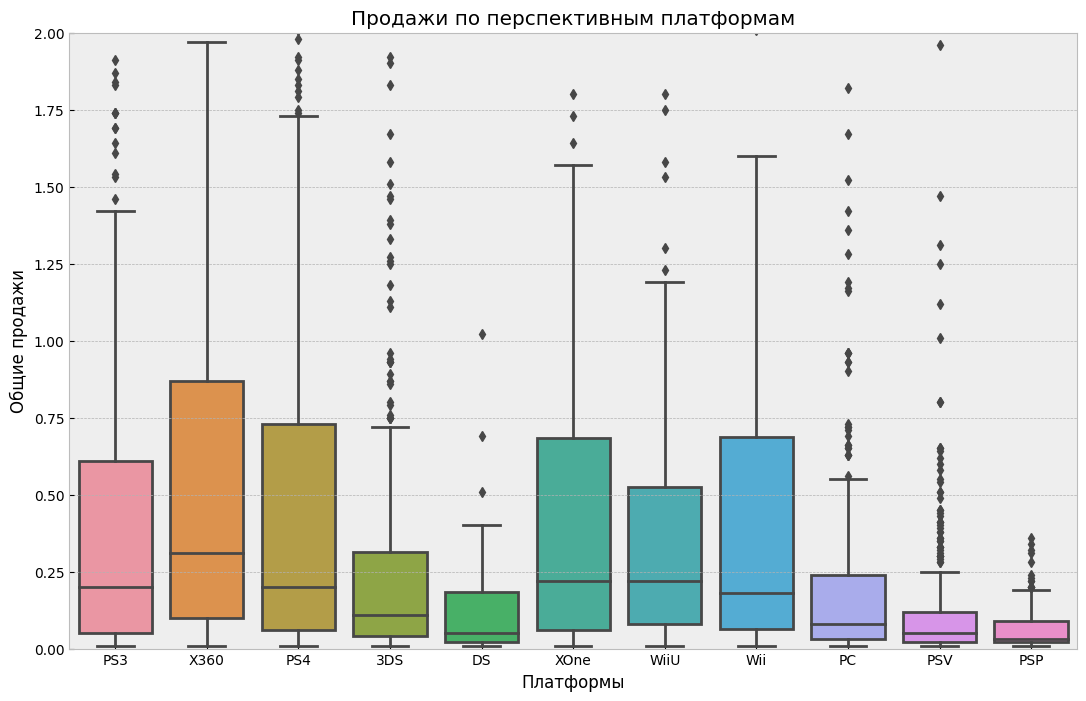

In [153]:
import seaborn as sns
data_temp, y = games_actual_years, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

- Средняя прибыль, полученная за игру по миру, составляет 501 тыс. дол. 75% игр собирают в среднем по 430 тыс. дол.
- Средняя прибыль, полученная за игру на PS4, составляет 801 тыс. дол. 75% игр собирают в среднем по 730 тыс. дол.
- Средняя прибыль, полученная за игру на X360, составляет 810 тыс. дол. 75% игр собирают в среднем по 870 тыс. дол.
- Средняя прибыль, полученная за игру на PS3, составляет 585 тыс. дол. 75% игр собирают в среднем по 610 тыс. дол.
- Средняя прибыль, полученная за игру на XOne, составляет 645 тыс. дол. 75% игр собирают в среднем по 685 тыс. дол.
- Средняя прибыль, полученная за игру на 3DS, составляет 491 тыс. дол. 75% игр собирают в среднем по 312 тыс. дол.

Исходя из графиков видно, что медиана протекает у всех по разному.

### Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. 

Строим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов критиков

In [154]:
games_crit_ps4 = games_actual_years[(games_actual_years['platform'] == 'PS4') & (games_actual_years['critic_score'] > 0)]
games_user_ps4 = games_actual_years[(games_actual_years['platform'] == 'PS4') & (games_actual_years['user_score'] > 0)]
games_cor_ps4 = games_actual_years[(games_actual_years['platform'] == 'PS4') \
                                   & (games_actual_years['critic_score'] > 0) \
                                   & (games_actual_years['user_score'] > 0)]

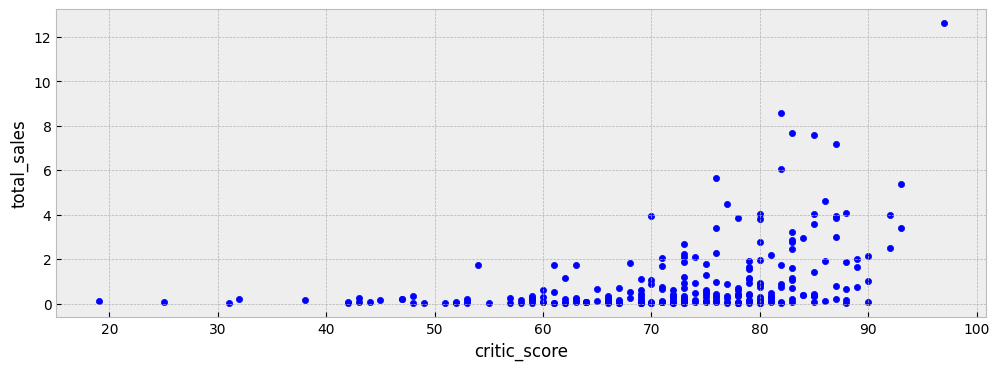

In [155]:
games_crit_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,4));

Строим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов пользователей

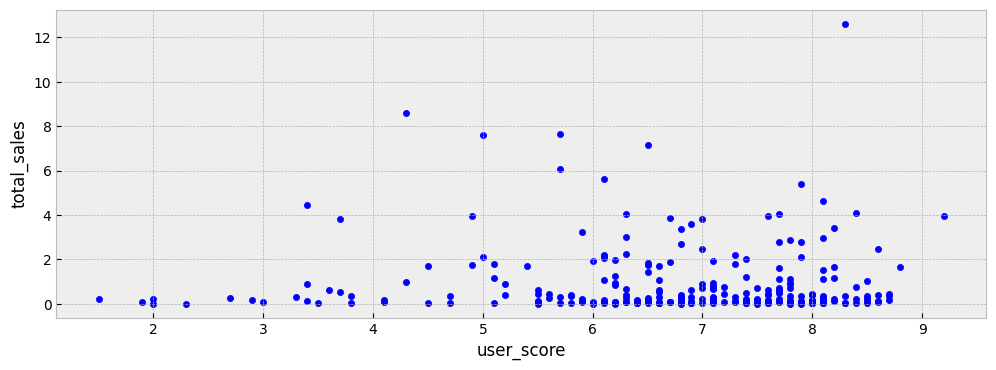

In [156]:
games_user_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,4));

Строю матрицу корреляции

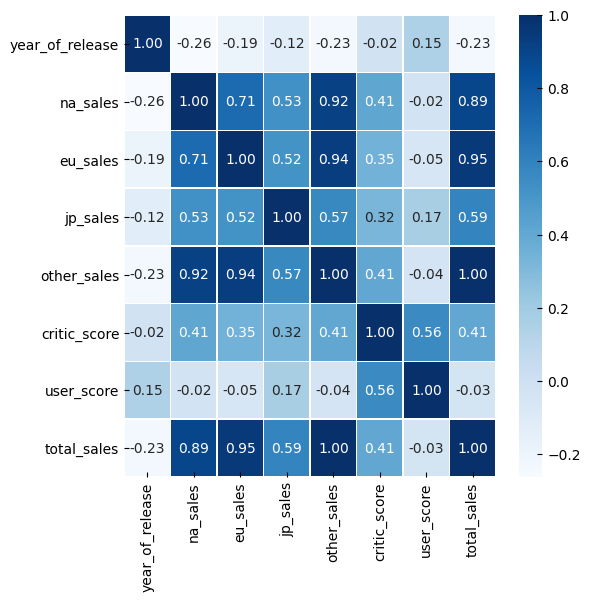

In [157]:
plt.figure(figsize=(6,6))
sns.heatmap(games_cor_ps4.corr(), cmap='Blues', annot=True, linewidth=.5, fmt='.2f');

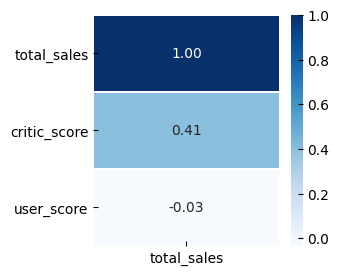

In [158]:
games_ps4_cor = games_cor_ps4[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(3,3))
sns.heatmap(games_ps4_cor.corr()[['total_sales']]. \
    sort_values(by='total_sales', ascending=False), cmap='Blues', annot=True, linewidth=.5, fmt='.2f');

Согласно диаграммам  рассеяния видно, отзывы критиков влияют на увеличение продаж, но слабо, чем лучше отзыв, тем лучше продажи, отзывы пользователей практически не имеют веса. В диаграмме отзыва пользователей немного больше выбросов.

Согласно матрице корреляции видим, что оценка критиков слабо влияет на продажи, нежели отзывы пользователей, которые практически не влияют.

Думаю, такая разница связана с тем, что критики имеют своих сторонников (подписчиков), которые воспринимают их оценки приоритетно, нежели оценки пользователей. Пользователи могут оценить тот или иной продукт по настроению, которое никак не отражает реальную ситуацию. Не стоит упускать и тот вариант, что мнение критиков может быть проплачено в рамках пиар компании игр.


### Соотнесем выводы с продажами игр на других популярных платформах.

Посмотрим, как влияют на продажи внутри одной популярной платформы (X360) отзывы пользователей и критиков

In [159]:
games_crit_X360 = games_actual_years[(games_actual_years['platform'] == 'X360') & (games_actual_years['critic_score'] > 0)]
games_user_X360 = games_actual_years[(games_actual_years['platform'] == 'X360') & (games_actual_years['user_score'] > 0)]
games_cor_X360 = games_actual_years[(games_actual_years['platform'] == 'X360') \
                                   & (games_actual_years['critic_score'] > 0) \
                                   & (games_actual_years['user_score'] > 0)]

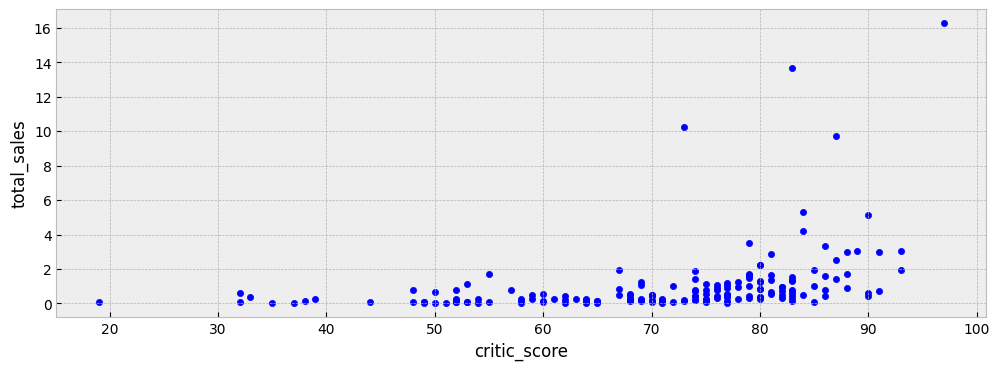

In [160]:
games_crit_X360.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,4));

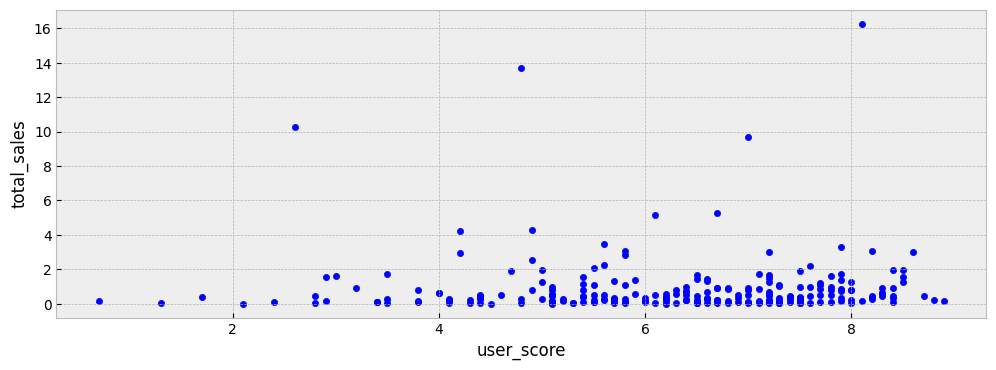

In [161]:
games_user_X360.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,4));

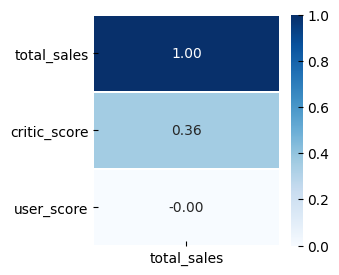

In [162]:
games_x360_cor = games_cor_X360[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(3,3))
sns.heatmap(games_x360_cor.corr()[['total_sales']]. \
            sort_values(by='total_sales', ascending=False), cmap='Blues', annot=True, linewidth=.5, fmt='.2f');

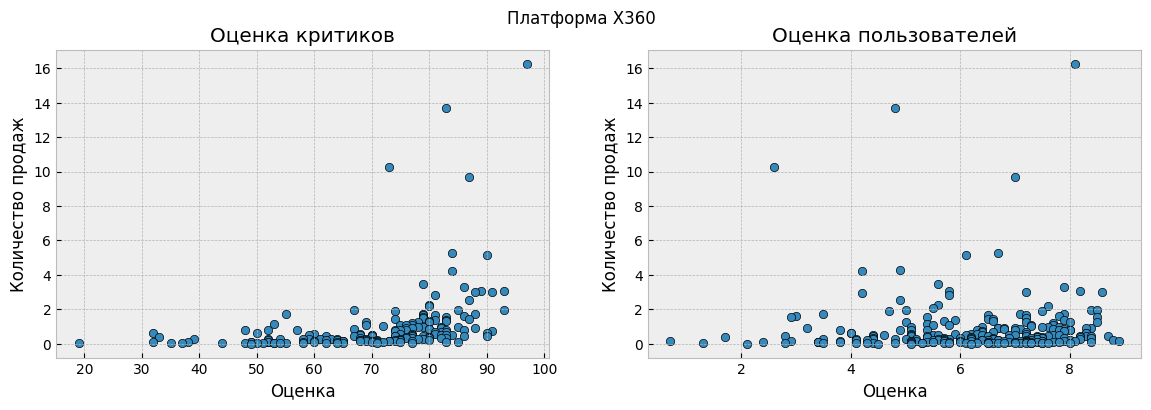

In [163]:
plt.style.use('bmh')

fig, ax = plt.subplots(1, 2, figsize = (14,4))

fig.suptitle('Платформа X360')
ax[0].set_title('Оценка критиков')
ax[1].set_title('Оценка пользователей')
ax[0].set(xlabel='Оценка')
ax[1].set(xlabel='Оценка')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')


ax[0].scatter(x=games_crit_X360['critic_score'], y=games_crit_X360['total_sales'], ec='black');
ax[1].scatter(x=games_user_X360['user_score'], y=games_user_X360['total_sales'], ec='black');

plt.show()


Посмотрим, как влияют на продажи внутри одной популярной платформы (PS3) отзывы пользователей и критиков

In [164]:
games_crit_PS3 = games_actual_years[(games_actual_years['platform'] == 'PS3') & (games_actual_years['critic_score'] > 0)]
games_user_PS3 = games_actual_years[(games_actual_years['platform'] == 'PS3') & (games_actual_years['user_score'] > 0)]
games_cor_PS3 = games_actual_years[(games_actual_years['platform'] == 'PS3') \
                                   & (games_actual_years['critic_score'] > 0) \
                                   & (games_actual_years['user_score'] > 0)]

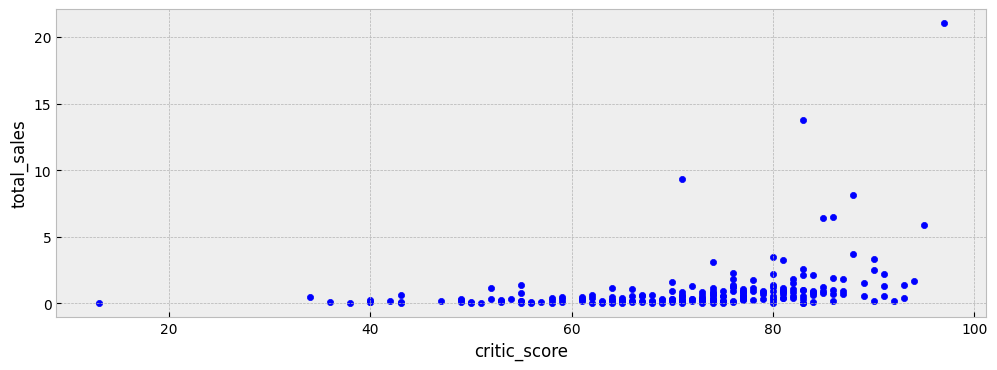

In [165]:
games_crit_PS3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,4));

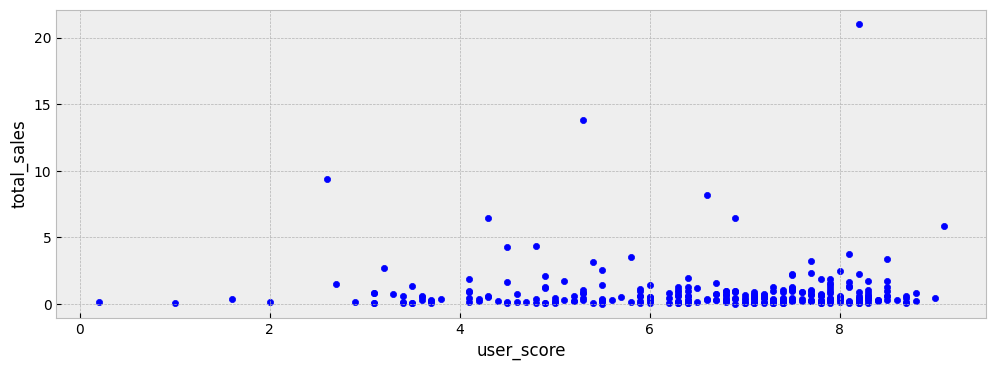

In [166]:
games_user_PS3.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,4));

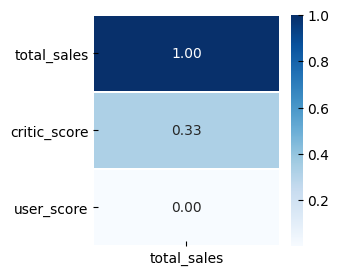

In [167]:
games_PS3_cor = games_cor_PS3[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(3,3))
sns.heatmap(games_PS3_cor.corr()[['total_sales']]. \
            sort_values(by='total_sales', ascending=False), cmap='Blues', annot=True, linewidth=.5, fmt='.2f');

Посмотрим, как влияют на продажи внутри одной популярной платформы (XOne) отзывы пользователей и критиков

In [168]:
games_crit_XOne = games_actual_years[(games_actual_years['platform'] == 'XOne') & (games_actual_years['critic_score'] > 0)]
games_user_XOne = games_actual_years[(games_actual_years['platform'] == 'XOne') & (games_actual_years['user_score'] > 0)]
games_cor_XOne = games_actual_years[(games_actual_years['platform'] == 'XOne') \
                                   & (games_actual_years['critic_score'] > 0) \
                                   & (games_actual_years['user_score'] > 0)]

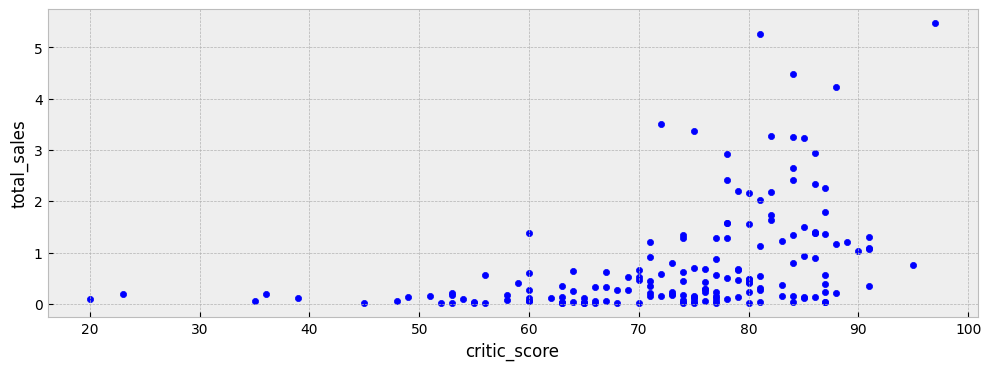

In [169]:
games_crit_XOne.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,4));

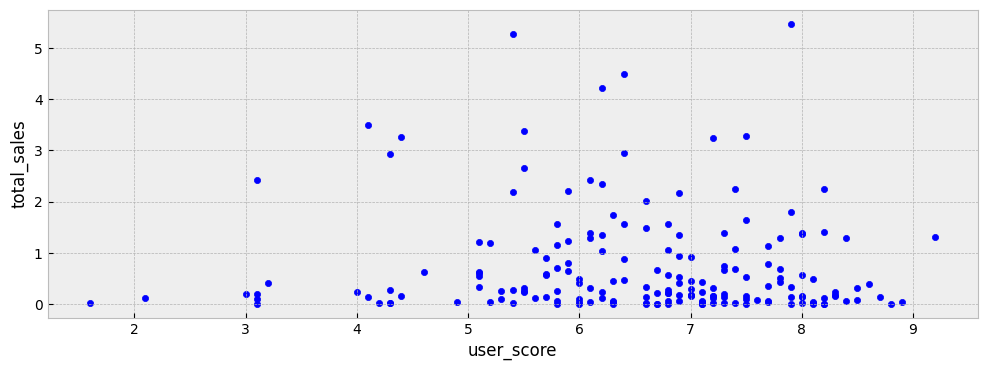

In [170]:
games_user_XOne.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,4));

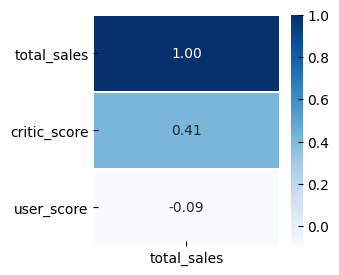

In [171]:
games_XOne_cor = games_cor_XOne[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(3,3))
sns.heatmap(games_XOne_cor.corr()[['total_sales']]. \
            sort_values(by='total_sales', ascending=False), cmap='Blues', annot=True, linewidth=.5, fmt='.2f');

Посмотрим, как влияют на продажи внутри одной популярной платформы (3DS) отзывы пользователей и критиков

In [172]:
games_crit_3DS = games_actual_years[(games_actual_years['platform'] == '3DS') & (games_actual_years['critic_score'] > 0)]
games_user_3DS = games_actual_years[(games_actual_years['platform'] == '3DS') & (games_actual_years['user_score'] > 0)]
games_cor_3DS = games_actual_years[(games_actual_years['platform'] == '3DS') \
                                   & (games_actual_years['critic_score'] > 0) \
                                   & (games_actual_years['user_score'] > 0)]

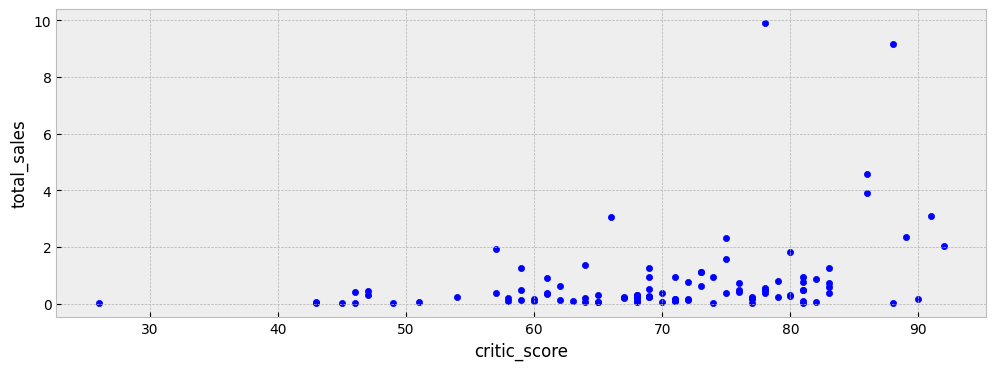

In [173]:
games_crit_3DS.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,4));

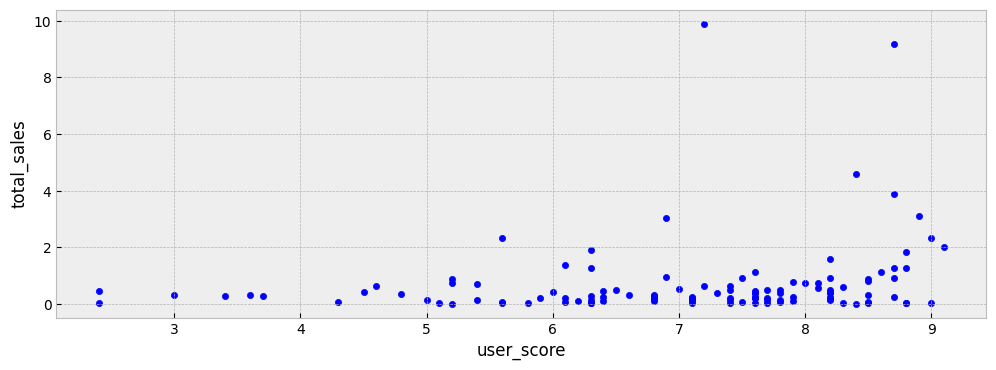

In [174]:
games_user_3DS.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,4));

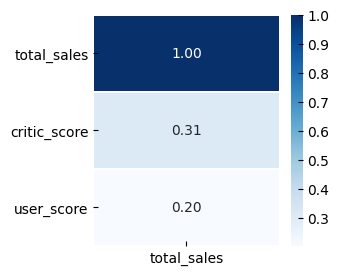

In [175]:
games_3DS_cor = games_cor_3DS[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(3,3))
sns.heatmap(games_3DS_cor.corr()[['total_sales']]. \
            sort_values(by='total_sales', ascending=False), cmap='Blues', annot=True, linewidth=.5, fmt='.2f');

Влияние оценок пользователей и критиков на всех изученных платформах аналогичны исследованию по PS4.

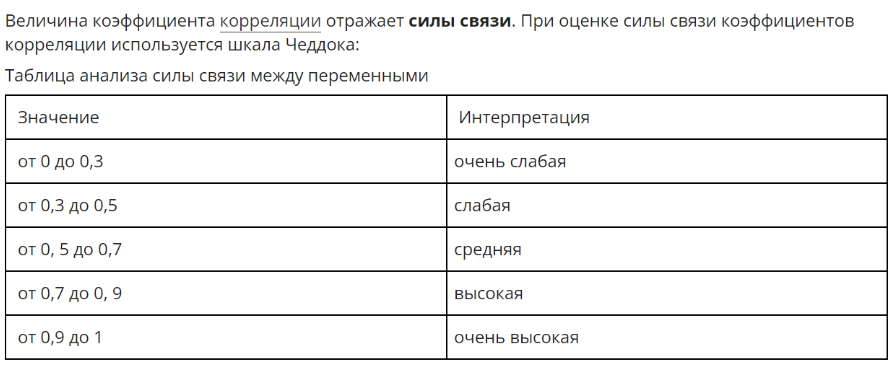

### Посмотрим на общее распределение игр по жанрам. 

Создадим сводную таблицу, и выведем график распределения игр по жанрам

In [176]:
genre_pivot = games_actual_years.pivot_table(
    index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_pivot = genre_pivot.reset_index()
genre_pivot

,genre,total_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


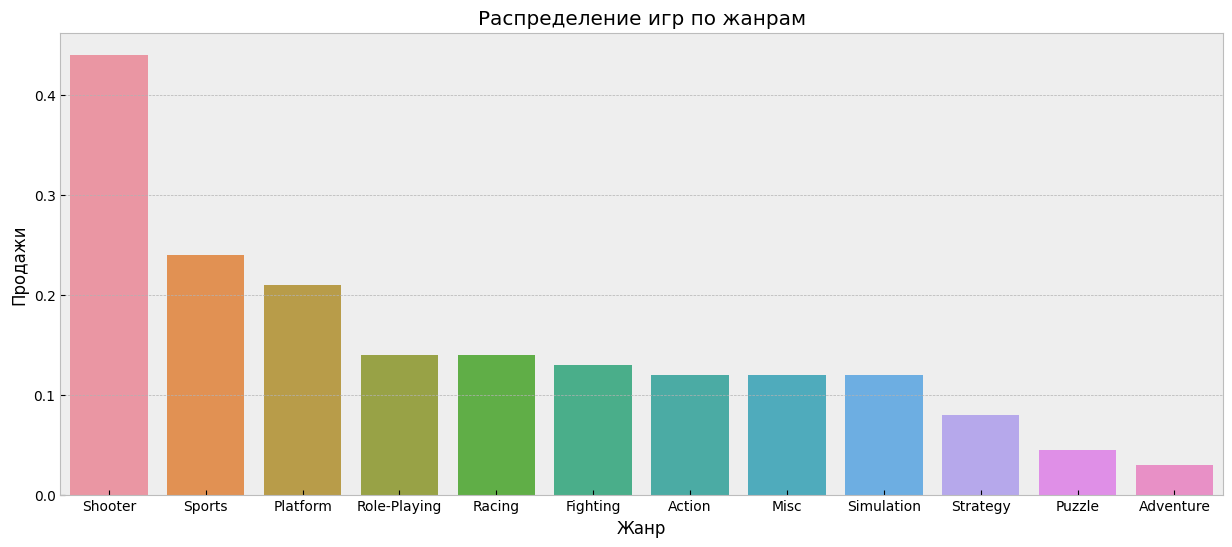

In [177]:
plt.figure(figsize=(15,6));
sns.barplot(data=genre_pivot, x='genre', y='total_sales');
plt.title("Распределение игр по жанрам");
plt.xlabel("Жанр");
plt.ylabel("Продажи");

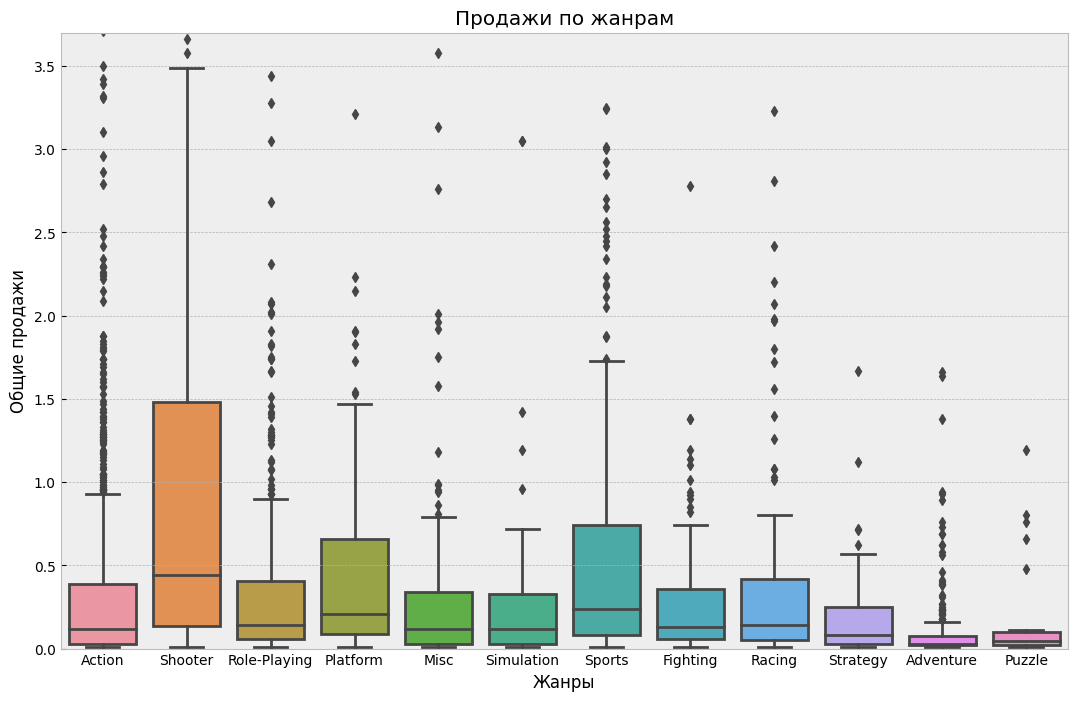

In [178]:
import seaborn as sns
data_temp, y = games_actual_years, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.7)))
plt.show()

Лидируют на консолях игры жанра Shooter, второе место Sports, третье за Platform. Последние три места Пазлы, они помоему никогда и не где не были лидерами, а в стратегии на консолях играть очень не удобно, а игры жанра Adventure, сильно на любителя.      

### Вывод по исследовательскому анализу данных:

- С развитием новых технологий и появлением на рынке таких гигантов как Sony Playstation , Xbox, Nintendo дало толчок к появлению на рынке огромного кол-ва игр.  Этот подьем происходил с 1994 по 2010 годы.  После этого происходит спад в продажах игр, но денежный поток в игровой индустрии не изменился, скорее даже возрос с учетом новых реалий.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Самые популярные игровые платформы за период с 2012 по 2016: PS4, PS3, Xbox360, PS3, 3DS, XOne.
- В среднем консоль живет  10 лет,  ее уход напрямую связан с выходом консолей нового поколения. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего продаются игры на Sony Playstation и Xbox.
- В большинстве случев, наблюдается взаимосвязь между продажами и оценками критиков.  Это значит для людей мнение критиков важнее мнения пользователей.
- Самые популярные жанры игр Shooter, Sports, Platform.
- Самые не популярные жанры игр Puzzle, Strategy Adventure.

## Составьте портрет пользователя каждого региона

Определим самые популярные консоли

In [179]:
na_sales_pivot = games_actual_years.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_sales_pivot = na_sales_pivot.reset_index().rename_axis(None, axis=1)
na_sales_pivot

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


In [180]:
eu_sales_pivot = games_actual_years.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_sales_pivot = eu_sales_pivot.reset_index().rename_axis(None, axis=1)
eu_sales_pivot

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


In [181]:
jp_sales_pivot = games_actual_years.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_sales_pivot = jp_sales_pivot.reset_index().rename_axis(None, axis=1)
jp_sales_pivot

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


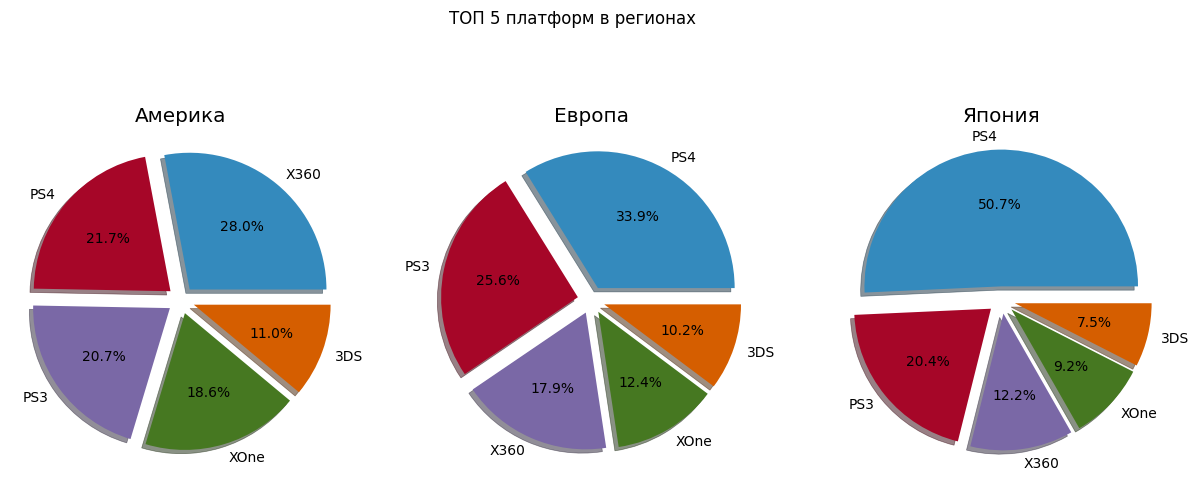

In [182]:
labels_na = (na_sales_pivot['platform'])
labels_eu = (eu_sales_pivot['platform'])
labels_jp = (jp_sales_pivot['platform'])

autopct=('%1.1f%%')
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(1, 3, figsize = (15,6))

fig.suptitle('ТОП 5 платформ в регионах')
ax[0].set_title('Америка')
ax[1].set_title('Европа')
ax[2].set_title('Япония')

ax[0].pie(na_sales_pivot['na_sales'], labels=labels_na, autopct=autopct, shadow = True, explode=explode);
ax[1].pie(eu_sales_pivot['eu_sales'], labels=labels_eu, autopct=autopct, shadow = True, explode=explode);
ax[2].pie(jp_sales_pivot['jp_sales'], labels=labels_eu, autopct=autopct, shadow = True, explode=explode);

plt.show()


- в Америке топ продаж X360, от американского производителя, что и не удивительно
- в Европе лидируют PS2 и PS3, X360 занимает третье место, похоже европейцы отдают предпочтение японским консолям
- в Японии Все верны "пути Самурая", в топе только Японские производители консолей

Определим самый популярный жанр

In [183]:
na_genre_pivot = games_actual_years.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_genre_pivot = na_genre_pivot.reset_index().rename_axis(None, axis=1)
na_genre_pivot

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


In [184]:
eu_genre_pivot = games_actual_years.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_genre_pivot = eu_genre_pivot.reset_index().rename_axis(None, axis=1)
eu_genre_pivot

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


In [185]:
jp_genre_pivot = games_actual_years.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_genre_pivot = jp_genre_pivot.reset_index().rename_axis(None, axis=1)
jp_genre_pivot

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


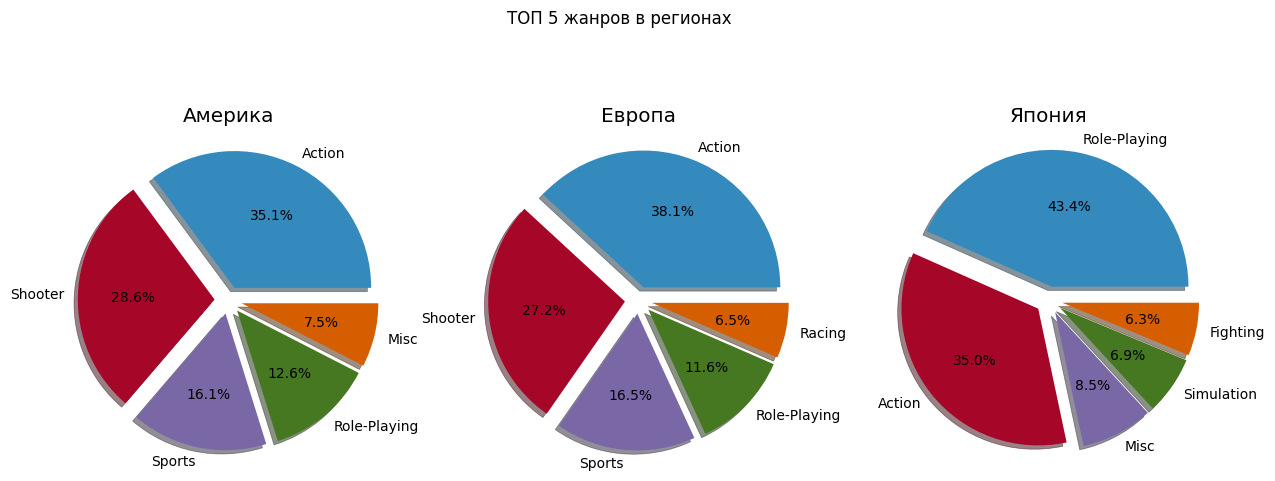

In [186]:
labels_genre_na = (na_genre_pivot['genre'])
labels_genre_eu = (eu_genre_pivot['genre'])
labels_genre_jp = (jp_genre_pivot['genre'])

autopct=('%1.1f%%')
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(1, 3, figsize = (15,6))

fig.suptitle('ТОП 5 жанров в регионах')
ax[0].set_title('Америка')
ax[1].set_title('Европа')
ax[2].set_title('Япония')

ax[0].pie(na_genre_pivot['na_sales'], labels=labels_genre_na, autopct=autopct, shadow = True, explode=explode);
ax[1].pie(eu_genre_pivot['eu_sales'], labels=labels_genre_eu, autopct=autopct, shadow = True, explode=explode);
ax[2].pie(jp_genre_pivot['jp_sales'], labels=labels_genre_jp, autopct=autopct, shadow = True, explode=explode);

plt.show()

- в Америке и в Европе вкусы практически идентичны, разница что в Америке предпочитают платформеры, а в Европе, гонки.
- в Японии пользователи обожают ролевые игры, причем сильно, экшен, шутеры и спорт там не так популярны

Определим в игры с каким рейтингом любят играть в Америке, Европе и Японии

In [187]:
na_rating_pivot = games_actual_years.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_rating_pivot = na_rating_pivot.reset_index().rename_axis(None, axis=1)
na_rating_pivot

,rating,na_sales
0,M,231.57
1,E,114.37
2,out of rating,103.31
3,E10+,75.70
4,T,66.02


In [188]:
eu_rating_pivot = games_actual_years.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_rating_pivot = eu_rating_pivot.reset_index().rename_axis(None, axis=1)
eu_rating_pivot

,rating,eu_sales
0,M,193.96
1,E,113.03
2,out of rating,91.50
3,E10+,55.37
4,T,52.96


In [189]:
jp_rating_pivot = games_actual_years.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_rating_pivot = jp_rating_pivot.reset_index().rename_axis(None, axis=1)
jp_rating_pivot

,rating,jp_sales
0,out of rating,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


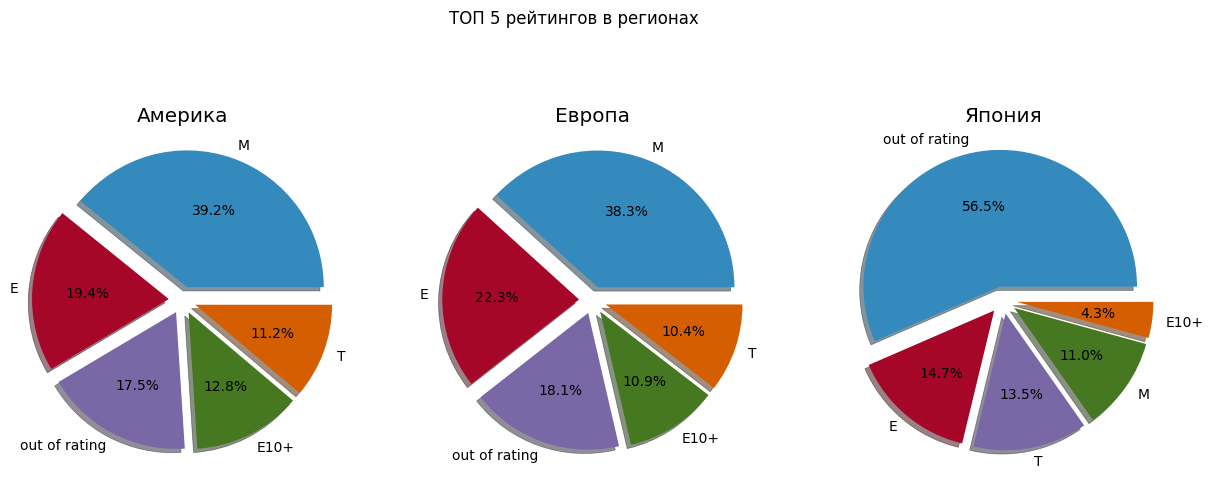

In [190]:
labels_rating_na = (na_rating_pivot['rating'])
labels_rating_eu = (eu_rating_pivot['rating'])
labels_rating_jp = (jp_rating_pivot['rating'])

autopct=('%1.1f%%')
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(1, 3, figsize = (15,6))

fig.suptitle('ТОП 5 рейтингов в регионах')
ax[0].set_title('Америка')
ax[1].set_title('Европа')
ax[2].set_title('Япония')

ax[0].pie(na_rating_pivot['na_sales'], labels=labels_rating_na, autopct=autopct, shadow = True, explode=explode);
ax[1].pie(eu_rating_pivot['eu_sales'], labels=labels_rating_eu, autopct=autopct, shadow = True, explode=explode);
ax[2].pie(jp_rating_pivot['jp_sales'], labels=labels_rating_jp, autopct=autopct, shadow = True, explode=explode);

plt.show()

Я уже делал предположение по поводу игр у которых не указан рейтинг(рискну предположить, что основной причиной пропусков является год релиза, сама система ESRB основана в 1994 году, а некоторые из рейтингов появились лишь в 2005. Соответвенно, игры вышедшие до 1994 по умолчанию не могли иметь рейтинг данной организации, добавим время на внедрение системы в мировую игровую сферу, вот и получаются отсутсвие рейтинга у ряда игр.)
Немного поискав в интернете, узнал, что в Японии своя организация занимающаяся системой рейтингов CERO. Вероятнее всего игры купленные в японии для японских консолей не попадают под ESRB.
Если отстраница от игр без рейтинга, и предположить что они являються частью игр категории E(игры для всех), то картина по всем станам приблизетельно одинакова, пользователи предпочитают игры категории Е(игры для всех). В Америке и Европе  популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей. В Японии лидириуют игры с возрастным рейтингом 13+.  

**Сосатвим портрет игроков по регионам:**
- Америка - игрок  17+ играющий на Xbox в экшен, спорт, шутеры
- Европа - игрок 17+ играющий на PS в экшен, спорт, шутеры
- Япония - игрок 13+, играющий на японских консолях в ролевые игры

## Проверьте гипотезы

### Гипотеза №1

Необходимо проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Сделаем выборку для каждой платформы

In [191]:
xbox_one = games_actual_years[(games_actual_years['platform'] == 'XOne') & (games_actual_years['user_score'] > 0)]['user_score']
pc = games_actual_years[(games_actual_years['platform'] == 'PC') & (games_actual_years['user_score'] > 0)]['user_score']

In [192]:
xbox_one.mean()

6.521428571428572

In [193]:
pc.mean()

6.4286407766990274

In [194]:
alpha = 0.01

results = st.ttest_ind(xbox_one, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


### Гипотеза №2

Необходимо проверить гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Сделаем выборку для каждого жанра игр

In [195]:
action = games_actual_years[(games_actual_years['genre'] == 'Action') & (games_actual_years['user_score'] > 0)]['user_score']
sports = games_actual_years[(games_actual_years['genre'] == 'Sports') & (games_actual_years['user_score'] > 0)]['user_score']

In [196]:
action.mean()

6.825047801147227

In [197]:
sports.mean()

5.455897435897437

In [198]:
alpha = 0.01

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Гипотеза №1 и Гипотеза №2 подтвердились.

При проверке отличия средних в группах с помощью критерия Стьюдента (t-критерия): Н0 - средние в группах равны, исходя из этого утверждения были сформированы НО и Н1.
Для оценки гипотезы применили тест Стюдента служащий для проверки гипотез о параметрах распределений. Соотвественно, получится ответ "Отвергаем нулевую гипотезу" или "Не получилось отвергнуть нулевую гипотезу".
Для проверки гипотез мы применили метод scipy.stats.ttest_ind
Это специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

## Общий вывод

В рамках проекта был получен, изучен и обработан архив данных.

Были обработаны пропущенные значения, заменены названия столбцов, заменены типы данных, а также устранены дубликаты.

Для проведения боле детального анализа в таблицу были посчитаны и добавлены следующие значения:
- total_sales -суммарные продажи во всех регионах

Проведен исследовательский анализ данных:

Проверено, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
По результатам иследования были сделаны следующие выводы:
- Данные до 1994гоможно не учитывать.
- После 1994 года в результате технического скачака и появления новых консолей идет рост продаж игр.
- После 2010 начинается спад продаж игр, но он связан с переводом свредств в другие игровые проекты и мобильные приложения.

Проверено, как менялись продажи по платформам.
По результатам иследования были сделаны следующие выводы:
- Больше всего игр было продано для PlayStation2, немного меньше для Xbox360, PS3, Wii, DS, PS.
- Средняя жизнь консоли порядка 10 лет. Основной пик продаж приходит приблизительно на 5ый год существования платформы, после чего начинается спад. Если проанализировать график для консолей PlayStation, то видно, что начало спада неразрывно связанно с выходом консолей нового поколения.
- Самые продаваемые это Sony PlayStation и XBOX, соответсвенно в 2017 стоит ожидать устойчивого роста PS4 и XBox One.

Проведен анализ по глобальным продажам игр в разбивке по платформам.
По результатам иследования были сделаны следующие выводы:
- Средняя прибыль, полученная за игру по миру, составляет 501 тыс. дол. 75% игр собирают в среднем по 430 тыс. дол.
- Средняя прибыль, полученная за игру на PS4, составляет 801 тыс. дол. 75% игр собирают в среднем по 730 тыс. дол.
- Средняя прибыль, полученная за игру на X360, составляет 810 тыс. дол. 75% игр собирают в среднем по 870 тыс. дол.
- Средняя прибыль, полученная за игру на PS3, составляет 585 тыс. дол. 75% игр собирают в среднем по 610 тыс. дол.
- Средняя прибыль, полученная за игру на XOne, составляет 645 тыс. дол. 75% игр собирают в среднем по 685 тыс. дол.
- Средняя прибыль, полученная за игру на 3DS, составляет 491 тыс. дол. 75% игр собирают в среднем по 312 тыс. дол.

Проверено, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков, а также сопоставлены выводы с другими консолями
По результатам иследования были сделаны следующие выводы:
- отзывы критиков влияют на увеличение продаж, но слабо, чем лучше отзыв, тем лучше продажи, отзывы пользователей практически не имеют веса. В диаграмме отзыва пользователей немного больше выбросов.
- оценка критиков слабо влияет на продажи, нежели отзывы пользователей, которые практически не влияют.
- влияние оценок пользователей и критиков на всех изученных платформах аналогичны исследованию по PS4.

Проверено на общее распределение игр по жанрам.
По результатам иследования были сделаны следующие выводы:
- Лидируют на консолях игры жанра Shooter, второе место Sports, третье за Platform. Последние три места Strategy, Puzzle, Adventure. 

Были составлены портреты пользователей каждого региона, результат следующий:
- Америка - игрок 17+ играющий на Xbox в экшен, спорт, шутеры
- Европа - игрок 17+ играющий на PS в экшен, спорт, шутеры
- Япония - игрок 13+, играющий на японских консолях в ролевые игры

Проверены гипотезы:
- Гипотеза №1:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Гипотеза №2:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Гипотеза №1 и Гипотеза №2 подтвердились


С развитием новых технологий и появлением на рынке таких гигантов как Sony Playstation , Xbox, Nintendo дало толчок к появлению на рынке огромного кол-ва игр. Этот подьем происходил с 1994 по 2010 годы. После этого происходит спад в продажах игр, но денежный поток в игровой индустрии не изменился, скорее даже возрос с учетом новых реалий.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
В среднем консоль живет 10 лет, ее уход напрямую связан с выходом консолей нового поколения. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего продаются игры на Sony Playstation и Xbox.
В большинстве случев, наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего связь продаж с оценками критиков. Это значит для людей мнение критиков важнее мнения других пользователей.
Самые популярные жанры игр Action, Sports, Shooter.
Самые не популярные жанры игр Puzzle и Strategy.

Рекомендации заказчику:
- Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
- Выставлять на прилавки популярные жанры - шутеры, спортивные и ролевые игры.
- Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
- Не забывать распространять компьютерные игры с популярных платформ на PC. Компьютер еще долго не выйдет из - конкуренции за игроков.